# Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# State of the art

- dropping low cardinality to reduce density and avoid noise (not meaningful characteristics)
```
#Drop low and high cardinality
df.drop(columns= ['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','veil-type'],inplace= True)
```
- model creation
- data split 80-20
- model training
- knn classifier with for loop [1-20] to check the best accuracy of n
```
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test,y_test)))
```

- Habitat Distribution (bar plot)
- Edible Vs Poisonous (bar plot)
- KNN alorgithm (#preprocessing - changing the values to numbers with label encoder)
- Random Forest Classifier




# Upload data from kaggle

In [1]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 30.6MB/s]


In [3]:
! unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


==============================================================

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [5]:
mushrooms = pd.read_csv('../content/mushrooms.csv')

In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
mushrooms.shape

(8124, 23)

In [9]:
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

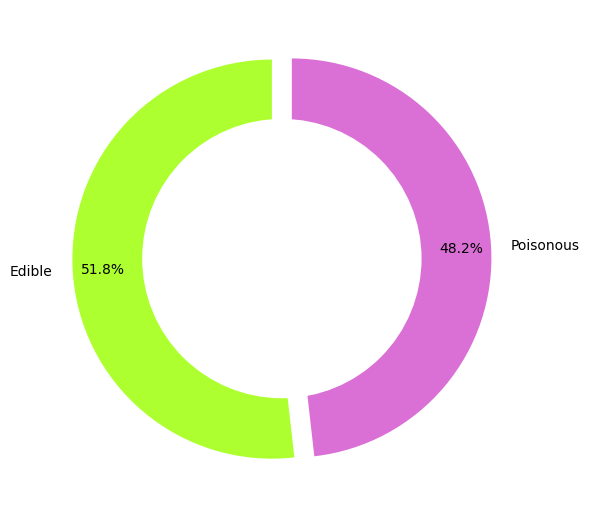

In [10]:
# wykres kołowy porównujący procent jadalnych grzybów względem trujących

plt.figure(figsize = (6,6))
plt.pie(mushrooms['class'].value_counts(),
        colors = ['#ADFF2F','#DA70D6'],
        labels = ['Edible', 'Poisonous'],
        autopct='%1.1f%%', startangle=90,
        pctdistance=0.85, explode = (0.05,0.05),
        shadow = False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

# Wizualizacja występowania poszczególnych kolorów kapeluszy:

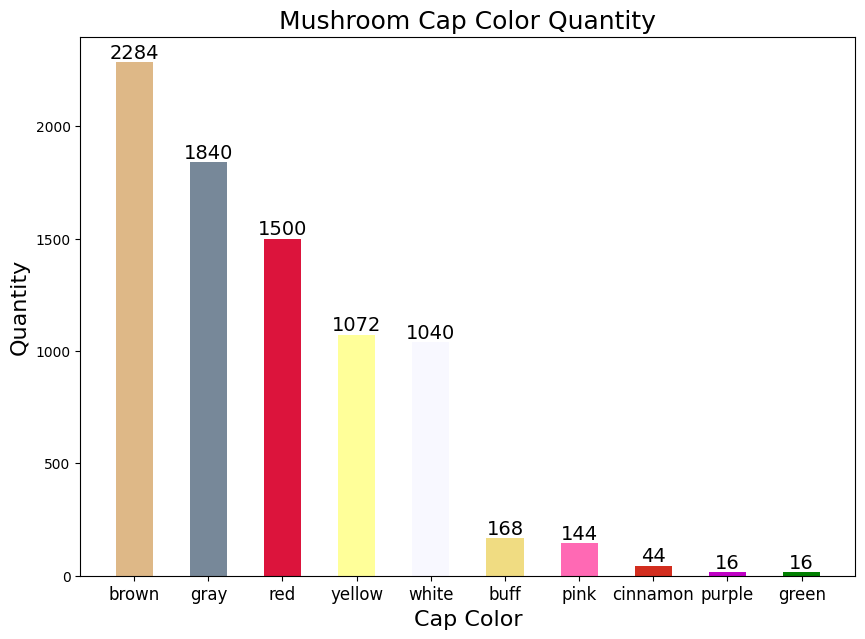

In [12]:
# wizualizacja występowania poszczególnych kolorów kapeluszy

cap_colors = mushrooms['cap-color'].value_counts()

m_height = cap_colors.values.tolist() # wartości numeryczne
cap_colors.axes # etykiety rzędów

cap_color_labels = cap_colors.axes[0].tolist() # index object >> list


ind = np.arange(10)  # miejsce na osi x dla słupków
width = 0.5        # szerokość słupków
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0

fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

# etykiety
ax.set_xlabel("Cap Color",fontsize=16)
ax.set_ylabel('Quantity',fontsize=16)
ax.set_title('Mushroom Cap Color Quantity',fontsize=18)
ax.set_xticks(ind) # ustalenie pozycji na osi x
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

# automatyczne dodawanie opisów słupków
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)
plt.show() # wyświetlenie wykresu

# Wizualizacja Jadalnych & Trujących grzybów na podstawie koloru kapelusza:

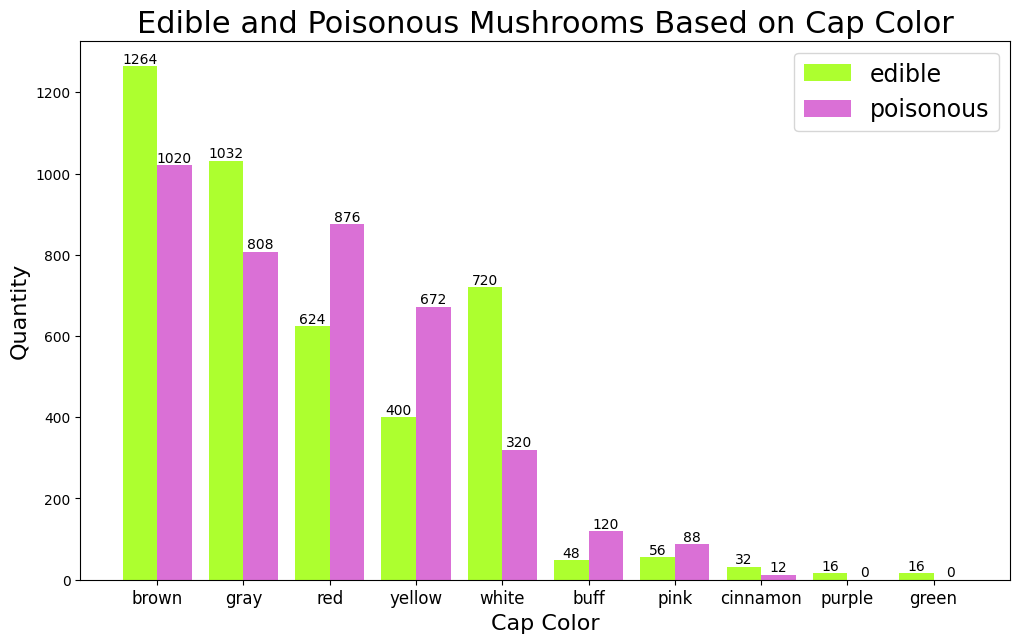

In [13]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)


width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

# tekst, etykiety
ax.set_xlabel("Cap Color",fontsize=16)
ax.set_ylabel('Quantity',fontsize=16)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) # miejsce na osi x
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
# print(edible_cc)
# print(poisonous_cc)

# Występowanie grzybów w danych środowiskach

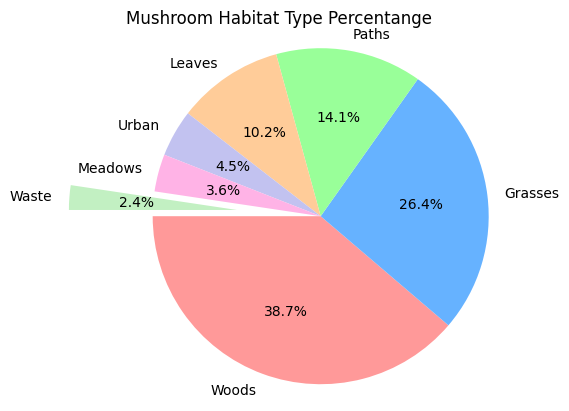

In [47]:
import matplotlib.pyplot as plt

# Dane
habitats = mushrooms['habitat'].value_counts()
hab_size = habitats.values.tolist()
hab_types = habitats.axes[0].tolist()

# Etykiety
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'

# Kolory
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
explode = (0, 0, 0, 0, 0, 0,0.5)

# Wykres kołowy
fig, ax = plt.subplots()
ax.pie(hab_size, labels=hab_labels, explode = explode, autopct='%1.1f%%', startangle=180, colors=colors)

# Ustawienia
ax.axis('equal')  # Zapewnia, że wykres jest okręgiem.

# Tytuł
plt.title('Mushroom Habitat Type Percentange')

# Wyświetl wykres
plt.show()


In [37]:
# wyodrębnienie habitatów i przypisanie ich wartości do listy
habitats = mushrooms['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list
print(habitats)

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

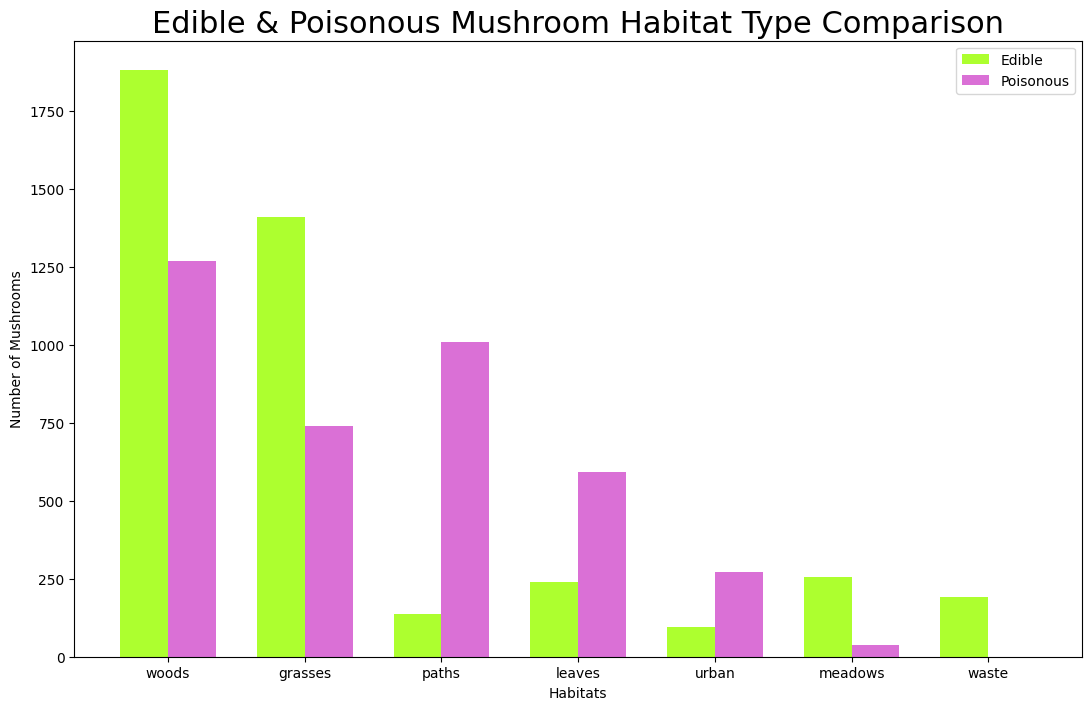

In [35]:
import matplotlib.pyplot as plt
import numpy as np


# Listy ze środowiskami
poisonous_hab = []
edible_hab = []

for hab in hab_types:
    size = len(mushrooms[mushrooms['habitat'] == hab].index)
    edibles = len(mushrooms[(mushrooms['habitat'] == hab) & (mushrooms['class'] == 'e')].index)
    edible_hab.append(edibles)  # Jadalne
    poisonous_hab.append(size - edibles)  # Trujące

# Konfiguracja bar chart dla wielu habitatów
fig, ax = plt.subplots(figsize=(13, 8))
bar_width = 0.35
index = np.arange(len(hab_types))

bar1 = ax.bar(index, edible_hab, bar_width, label='Edible', color='#ADFF2F')
bar2 = ax.bar(index + bar_width, poisonous_hab, bar_width, label='Poisonous', color='#DA70D6')

ax.set_title('Edible & Poisonous Mushroom Habitat Type Comparison', fontsize=22)
ax.set_xlabel('Habitats')  # Etykieta osi x
ax.set_ylabel('Number of Mushrooms')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['woods', 'grasses', 'paths', 'leaves', 'urban', 'meadows', 'waste'])  # Etykiety habitatów
# woods grasses paths leaves urban meadows waste
ax.legend()

plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [20]:
# Podziel dane na cechy (X) i etykiety (y)
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']

# Zakoduj dane tekstowe na wartości liczbowe
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.95, random_state=4)



In [21]:
# Utwórz model RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, random_state=42)

# Trenuj model na danych treningowych
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1, random_state=42)

In [22]:
# Przewiduj etykiety dla danych testowych
y_pred = model.predict(X_test)

# Ocen skuteczność modelu
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Wypisz raport klasyfikacji
print(classification_report(y_test, y_pred))


Accuracy: 0.9641098730240996
              precision    recall  f1-score   support

           e       0.98      0.95      0.96      3998
           p       0.94      0.98      0.96      3720

    accuracy                           0.96      7718
   macro avg       0.96      0.96      0.96      7718
weighted avg       0.96      0.96      0.96      7718



In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Utwórz model KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=3)

# Trenuj model na danych treningowych
kn_model.fit(X_train, y_train)

# Przewiduj etykiety dla danych testowych
y_pred = kn_model.predict(X_test)

# Ocen skuteczność modelu
accuracy_kn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_kn}')

# Wypisz raport klasyfikacji
print(classification_report(y_test, y_pred))

Accuracy: 0.9571132417724799
              precision    recall  f1-score   support

           e       0.96      0.96      0.96      3998
           p       0.96      0.95      0.96      3720

    accuracy                           0.96      7718
   macro avg       0.96      0.96      0.96      7718
weighted avg       0.96      0.96      0.96      7718



Grid search on Random Forest Classifier

In [24]:
from sklearn.model_selection import  GridSearchCV

X = mushrooms.drop('class', axis=1)
y = mushrooms['class']

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.95, random_state=12)

rf_model = RandomForestClassifier()

# Definicja gridu hiperparametrów do przeszukania
param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Zebranie najlepszych parametrow
best_params = grid_search.best_params_

# Trening modelu na nich
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Dokonanie predykcji i ocena modelu
y_pred = best_model.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy_rfc}')
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 15}
Accuracy: 0.9883389479139674
              precision    recall  f1-score   support

           e       0.98      1.00      0.99      3977
           p       1.00      0.98      0.99      3741

    accuracy                           0.99      7718
   macro avg       0.99      0.99      0.99      7718
weighted avg       0.99      0.99      0.99      7718



# Wykres precyzji - erozji

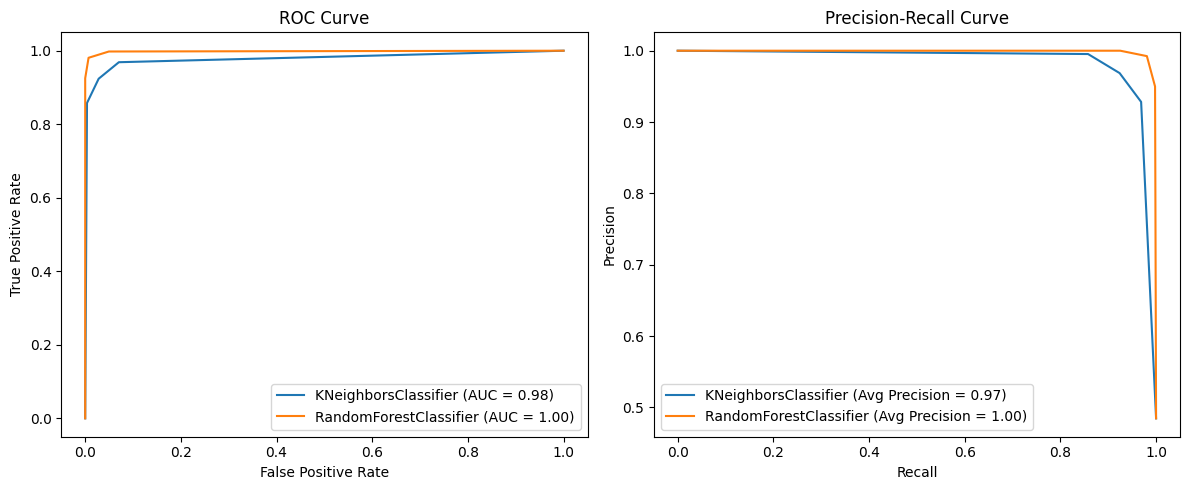

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Przygotuj dane
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.95, random_state=12)

# KNeighborsClassifier
k_neighbors_model = KNeighborsClassifier(n_neighbors=3)
k_neighbors_model.fit(X_train, y_train)

# RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=3, random_state=12)
random_forest_model.fit(X_train, y_train)

# Funkcja do rysowania krzywej ROC
def plot_roc_curve(y_true, y_scores, label, ax):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    ax.legend()
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')

# Funkcja do rysowania krzywej precyzji-erozji
def plot_precision_recall_curve(y_true, y_scores, label, ax):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    avg_precision = average_precision_score(y_true, y_scores)
    ax.plot(recall, precision, label=f'{label} (Avg Precision = {avg_precision:.2f})')
    ax.legend()
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('Precision-Recall Curve')

# KNeighborsClassifier - Krzywe ROC
y_scores_kneighbors = k_neighbors_model.predict_proba(X_test)[:, 1]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_roc_curve(y_test, y_scores_kneighbors, 'KNeighborsClassifier', ax[0])

# RandomForestClassifier - Krzywe ROC
y_scores_random_forest = random_forest_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_scores_random_forest, 'RandomForestClassifier', ax[0])

# KNeighborsClassifier - Krzywe precyzji-erozji
plot_precision_recall_curve(y_test, y_scores_kneighbors, 'KNeighborsClassifier', ax[1])

# RandomForestClassifier - Krzywe precyzji-erozji
plot_precision_recall_curve(y_test, y_scores_random_forest, 'RandomForestClassifier', ax[1])

plt.tight_layout()
plt.show()


# Optuna

In [27]:
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [28]:
import optuna

def objective(trial):
    # Definicja hiperparametrow do optymalizacji
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

    # Tworzenie modelu
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    model.fit(X_train, y_train)

    # Ocena modelu
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Optymalizacja
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Zdobycie najlepszych parametrow
best_params = study.best_params
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)
best_model.fit(X_train, y_train)

# Predykcja i ocena modelu
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

[I 2024-01-17 22:30:38,643] A new study created in memory with name: no-name-03bfc348-a626-4840-99e5-ecc219207026
[I 2024-01-17 22:30:38,903] Trial 0 finished with value: 0.9876911116869656 and parameters: {'n_estimators': 78, 'max_depth': 28, 'min_samples_split': 7}. Best is trial 0 with value: 0.9876911116869656.
[I 2024-01-17 22:30:39,206] Trial 1 finished with value: 0.985358901269759 and parameters: {'n_estimators': 126, 'max_depth': 16, 'min_samples_split': 4}. Best is trial 0 with value: 0.9876911116869656.
[I 2024-01-17 22:30:39,517] Trial 2 finished with value: 0.9845814977973568 and parameters: {'n_estimators': 131, 'max_depth': 11, 'min_samples_split': 9}. Best is trial 0 with value: 0.9876911116869656.
[I 2024-01-17 22:30:40,043] Trial 3 finished with value: 0.9861363047421612 and parameters: {'n_estimators': 148, 'max_depth': 22, 'min_samples_split': 2}. Best is trial 0 with value: 0.9876911116869656.
[I 2024-01-17 22:30:40,436] Trial 4 finished with value: 0.9869137082145

Best Parameters: {'n_estimators': 78, 'max_depth': 28, 'min_samples_split': 7}
Accuracy: 0.9850997667789583
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3977
           1       0.99      0.98      0.98      3741

    accuracy                           0.99      7718
   macro avg       0.99      0.98      0.99      7718
weighted avg       0.99      0.99      0.99      7718



In [29]:
optuna.visualization.plot_contour(study, params=['n_estimators', 'max_depth', 'min_samples_split'])

Dimensionality reduction

In [30]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Principal Component Analysis (PCA)

In [31]:
# Definicja liczby komponentów dla PCA
n_components = 8

# Inicjalizacja obiektu PCA z zadaną liczbą komponentów
pca = PCA(n_components=n_components)

# Transformacja danych treningowych przy użyciu PCA
X_train_pca = pca.fit_transform(X_train)

# Transformacja danych testowych przy użyciu tych samych komponentów PCA co dla danych treningowych
X_test_pca = pca.transform(X_test)

rf_classifier = RandomForestClassifier(random_state=42)

# Trenowanie modelu na danych treningowych przekształconych przez PCA
rf_classifier.fit(X_train_pca, y_train)

# Predykcja na danych testowych przekształconych przez PCA
y_pred_pca = rf_classifier.predict(X_test_pca)

# Ocena dokładności modelu przy użyciu accuracy_score
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Wyświetlanie raportu klasyfikacyjnego (classification report) dla dodatkowych metryk oceny modelu
print("Classification Report for PCA:")
print(classification_report(y_test, y_pred_pca))


Classification Report for PCA:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3977
           1       0.95      0.89      0.92      3741

    accuracy                           0.92      7718
   macro avg       0.93      0.92      0.92      7718
weighted avg       0.93      0.92      0.92      7718



Linear Discriminant Analysis (LDA)

In [33]:
# Określenie liczby unikalnych klas w zbiorze treningowym
num_classes = len(np.unique(y_train))

# Określenie liczby komponentów dla LDA, ograniczonej do liczby klas minus jeden
n_components_lda = min(X_train.shape[1], num_classes - 1)

# Inicjalizacja obiektu LinearDiscriminantAnalysis (LDA) z zadaną liczbą komponentów
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)

# Transformacja danych treningowych przy użyciu LDA
X_train_lda = lda.fit_transform(X_train, y_train)

# Transformacja danych testowych przy użyciu tych samych komponentów LDA co dla danych treningowych
X_test_lda = lda.transform(X_test)

rf_classifier = RandomForestClassifier(random_state=42)

# Trenowanie modelu na danych treningowych przekształconych przez LDA
rf_classifier.fit(X_train_lda, y_train)

# Predykcja na danych testowych przekształconych przez LDA
y_pred_lda = rf_classifier.predict(X_test_lda)

print("Classification Report for LDA:")
print(classification_report(y_test, y_pred_lda))


Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3977
           1       0.95      0.94      0.95      3741

    accuracy                           0.95      7718
   macro avg       0.95      0.95      0.95      7718
weighted avg       0.95      0.95      0.95      7718



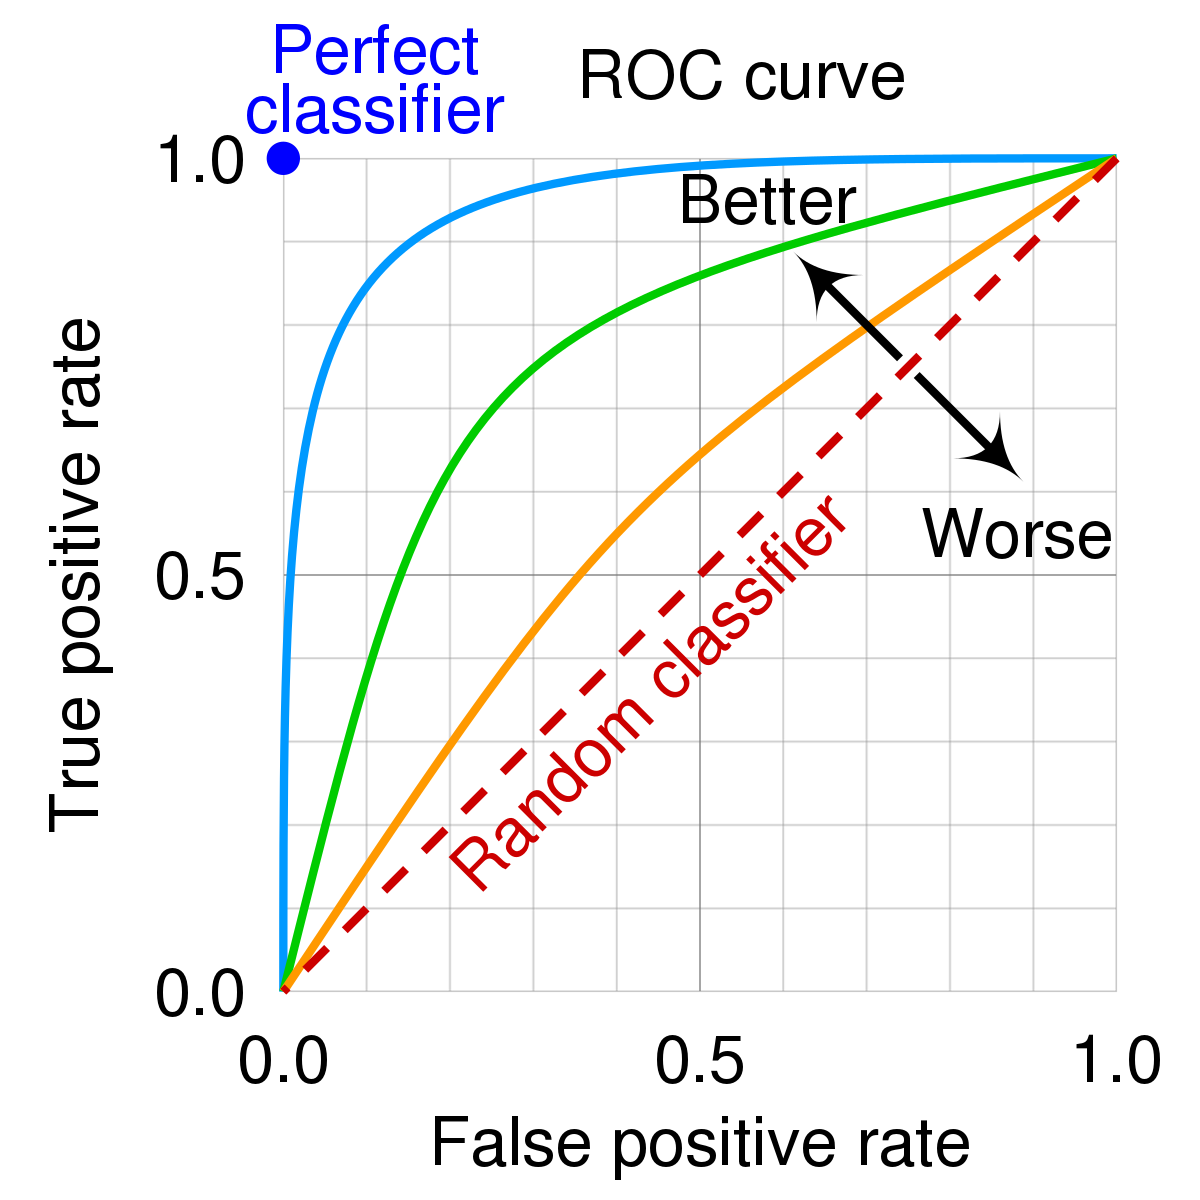



# **Dokumentacja projektu**

## **Cel projektu**

Celem projektu było wytrenowanie modelu potrafiącego z dużą celnością stwierdzić, czy grzyb jest jadalny czy nie.

## **Wyniki**

Modele osiągnęły bardzo wysoką dokładność, wynoszącą praktycznie 100%. Oznacza to, że są w stanie z bardzo dużą pewnością stwierdzić, czy dany grzyb jest jadalny.

## **Ograniczenia**

Ze względu na ograniczony rozmiar zbioru danych, nie udało się dokładniej sprawdzić działania metod użytych w projekcie i zobaczyć różnic między nimi w działaniu. Pozyskanie większego zbioru danych z większą ilością grzybów umożliwiłoby lepsze porównanie metod i dokładniejsze określenie ich wydajności.

## **Rekomendacje**

W celu poprawy wyników projektu zaleca się pozyskanie większego zbioru danych z większą ilością grzybów. Pozwoli to na dokładniejsze sprawdzenie działania metod użytych w projekcie i dokładniejsze określenie ich wydajności.

## **Wnioski**

Projekt osiągnął zadowalające wyniki, ale istnieje potencjał do dalszej poprawy jego wydajności. Pozyskanie większego zbioru danych pozwoli na dokładniejsze sprawdzenie działania metod i dokładniejsze określenie ich wydajności.